* Amir Esmaeili, 50225893, s77aesma@uni-bonn.de
* Kiavash Jamshidi, 50151853, s19kjams@uni-bonn.de

### Project Setup
Installation Instructions
Follow these steps to set up the environment and install the required dependencies.

### Step 1: Install Dependencies
First, make sure you have all the necessary packages installed. Run the following command to install the dependencies listed in requirements.txt:


In [10]:
!pip install spacy && pip install pandas && pip install seaborn


  Using cached numpy-2.0.2-cp311-cp311-macosx_14_0_arm64.whl.metadata (60 kB)
Using cached numpy-2.0.2-cp311-cp311-macosx_14_0_arm64.whl (5.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
scipy 1.11.4 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.0.2 which is incompatible.
streamlit 1.30.0 requires numpy<2,>=1.19.3, but you have numpy 2.0.2 which is incompatible.
pandas 2.1.4 requires numpy<2,>=1.23.2; python_version == "3.11", but you have numpy 2.0.2 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.0.2 which is incompatible.
matplotlib 3.8.0 requires numpy<2,>=1.21, but you have numpy 2.0.2 which is 

### Step 2: Download SpaCy Language Model
Next, download the English language model for SpaCy, which is required for natural language processing tasks such as tokenization and lemmatization. You can do this with the following command:

In [11]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 7.0 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


### Task 1 (2 points)
This function, extract_proper_nouns, takes a file name as input, reads its content,
and returns a list of multi-word proper nouns found in the text.
It uses scikit-learn's CountVectorizer to split the text into tokens (words).
The function then identifies sequences of words that start with an uppercase letter,
considering them as proper nouns if they contain more than one consecutive word.
Finally, it returns a list of these multi-word proper nouns.


In [12]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to extract sequences of proper nouns from a text file
def extract_proper_nouns(my_file_name):
    # List to store phrases with multiple proper nouns
    several_token_propn = []
    
    # Open the file and read its content as a single string
    with open(my_file_name, 'r') as file:
        text = file.read()
    
    # Tokenize the text into individual words
    vectorizer = CountVectorizer().build_tokenizer()
    tokens = vectorizer(text)
    
    # Temporary list to store consecutive proper nouns
    current_propn = []
    
    # Iterate over each word in the tokenized text
    for word in tokens:
        # Check if the word starts with an uppercase letter (assumes it's a proper noun)
        if word[0].isupper():
            current_propn.append(word)  # Add word to the current sequence of proper nouns
        else:
            # If a lowercase word is encountered, check if the current sequence is longer than one word
            if len(current_propn) > 1:
                # Join and save the current sequence of proper nouns as a phrase
                several_token_propn.append(" ".join(current_propn))
            current_propn = []  # Reset the sequence of proper nouns
    
    # After the loop, check if there's a remaining sequence of proper nouns to add
    if len(current_propn) > 1:
        several_token_propn.append(" ".join(current_propn))
    
    # Return the list of multi-word proper noun phrases
    return several_token_propn

# Call the function with the file name
extract_proper_nouns("test1.txt")


['Honk Kong', 'New York']

### Task 2

# Common Lemma Extraction Function

This notebook defines a function `common_lemma(my_file_name)` that processes a text file and returns a dictionary where:
- **Key**: The lemma (root form) of the word.
- **Value**: A list of distinct words that share the same lemma and appear as both nouns and verbs.

### Function Workflow:
1. The function reads the input file and processes its content using the **spaCy** library.
2. It tokenizes the text and checks if each token is either a **noun** or a **verb**.
3. For each noun/verb token, the function retrieves its lemma and tracks the word form along with its part of speech.
4. The function only includes lemmas in the final dictionary if they appear as both **nouns** and **verbs** in the text.
5. The output dictionary contains only these lemmas, with each key associated with a list of distinct word forms.

In [13]:
import spacy

# Load the English language model from spaCy
nlp = spacy.load("en_core_web_sm")

# Function to find common lemmas for nouns and verbs in a text file
def common_lemma(my_file_name):
    # Dictionary to store lemmas with their corresponding word forms and POS tags
    lemma_data = {}

    # Open the file and read its content as a single string
    with open(my_file_name, 'r') as file:
        text = file.read()
    
    # Process the text with spaCy to get tokens and their linguistic properties
    doc = nlp(text)
    
    # Iterate over each token in the processed document
    for token in doc:
        # Only consider nouns and verbs
        if token.pos_ in {"NOUN", "VERB"}:
            lemma = token.lemma_  # Get the lemma (base form) of the token
            
            # Initialize lemma data if not already in the dictionary
            if lemma not in lemma_data:
                lemma_data[lemma] = {"words": [], "pos_tags": set()}
            
            # Add the token's text and POS tag to the lemma data
            lemma_data[lemma]["words"].append(token.text)
            lemma_data[lemma]["pos_tags"].add(token.pos_)
    
    # Filter lemmas that have both noun and verb forms
    tokens_with_common_lemma = {
        lemma: list(set(data["words"]))  # Use set to remove duplicates
        for lemma, data in lemma_data.items()
        if "NOUN" in data["pos_tags"] and "VERB" in data["pos_tags"]
    }
    
    # Return the dictionary of lemmas with both noun and verb forms
    return tokens_with_common_lemma

# Call the function with the file name
common_lemma("test2.txt")

{'query': ['querying', 'query'], 'show': ['showed', 'show', 'showing']}

### Task 3

### BBC News Dataset Loading

This notebook demonstrates how to load and inspect the **BBC News dataset** using the **pandas** library.

### Steps:
1. The function loads the **`bbc-news.csv`** file into a **pandas DataFrame**.
2. The first few rows of the dataset are displayed using `head()`, allowing us to preview the structure and content of the data.


In [14]:
import pandas as pd

file_path = 'bbc-news.csv' 
bbc_data = pd.read_csv(file_path)

print(bbc_data.head())

        category                                               text
0           tech  tv future in the hands of viewers with home th...
1       business  worldcom boss  left books alone  former worldc...
2          sport  tigers wary of farrell  gamble  leicester say ...
3          sport  yeading face newcastle in fa cup premiership s...
4  entertainment  ocean s twelve raids box office ocean s twelve...


### Task 4

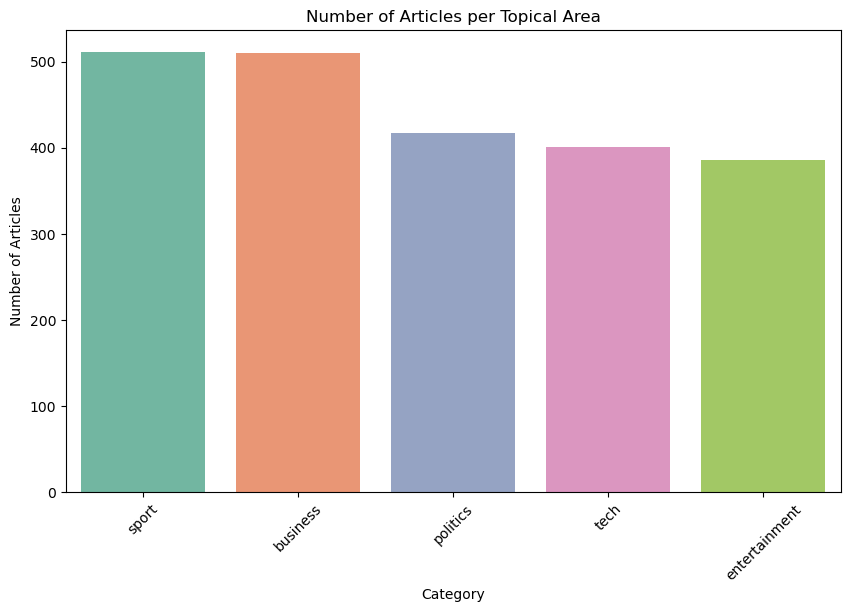

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'bbc-news.csv'
bbc_data = pd.read_csv(file_path)

category_counts = bbc_data['category'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='Set2')
plt.title('Number of Articles per Topical Area')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()


### Task 5

### Text Preprocessing with spaCy

This script demonstrates how to preprocess text by removing punctuation and numbers using the `spaCy` library. 

1. **Remove Punctuation**: Filters out punctuation marks from the text.
2. **Remove Numbers**: Eliminates any numeric values.

Both functions are applied sequentially to clean the text for further analysis or processing.


In [16]:
import spacy

# Load the English language model from spaCy
nlp = spacy.load("en_core_web_sm")

# Function to remove punctuation from text
def remove_punctuation(text):
    # Process the text using spaCy to get tokenized output
    doc = nlp(text)
    # Join tokens back into a single string, excluding punctuation tokens
    cleaned_text = " ".join([token.text for token in doc if not token.is_punct])
    return cleaned_text

# Function to remove numbers from text
def remove_numbers(text):
    # Process the text again with spaCy to get tokenized output
    doc = nlp(text)
    # Join tokens back into a single string, excluding tokens that are purely digits
    cleaned_text = " ".join([token.text for token in doc if not token.is_digit])
    return cleaned_text

# Sample text with punctuation and numbers
sample_text = "Hello! This is a test sentence with some numbers: 12345 and punctuation!!!"

# Remove punctuation from the sample text
text_without_punctuation = remove_punctuation(sample_text)
# Remove numbers from the punctuation-free text
text_without_numbers = remove_numbers(text_without_punctuation)

# Print the original text and the cleaned versions
print("Original Text:", sample_text)
print("Text without Punctuation:", text_without_punctuation)
print("Text without Numbers:", text_without_numbers)

Original Text: Hello! This is a test sentence with some numbers: 12345 and punctuation!!!
Text without Punctuation: Hello This is a test sentence with some numbers 12345 and punctuation
Text without Numbers: Hello This is a test sentence with some numbers and punctuation


# Task 6

## Task 6.1


In [17]:
# Split the data into training and test set (70% - 30%) and use Scikit-learn to shuffle it with seed = 101
from sklearn.model_selection import train_test_split


seed = 101
train_data, test_data = train_test_split(bbc_data, test_size=0.3, random_state=seed)  # shuffle is true by default

print("Training Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)
print("----Train----")
print(train_data.head())
print("----Test----")
print(test_data.head())


Training Data Shape: (1557, 2)
Test Data Shape: (668, 2)
----Train----
           category                                               text
920   entertainment  oscar nominees lack pulling power this year s ...
1500           tech  smartphones suffer skulls attack owners of som...
1711          sport  souness backs smith for scotland graeme sounes...
1978       business  venezuela reviews foreign deals venezuela is t...
1125       business  parmalat founder offers apology the founder an...
----Test----
           category                                               text
2148       business  standard life concern at lse bid standard life...
2018       politics  uk plan to deport terror suspects deals are be...
37    entertainment  row threatens hendrix museum plan proposals to...
1150           tech  intel unveils laser breakthrough intel has sai...
1124       politics  uk s  useless  quangos under fire the uk has 5...


## Task 6.2

In [18]:
# Let's convert each article to vector representation using tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# a) Create TF-IDF vectors
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(train_data['text'])
X_test_tfidf = tfidf.transform(test_data['text'])  # Using test set from Task 6.1


In [19]:
from sklearn.preprocessing import LabelEncoder

# Prepare the labels
le = LabelEncoder()
y_train = le.fit_transform(train_data['category'])
y_test = le.transform(test_data['category'])
y_test_categories = test_data['category'].to_numpy()

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# b) Train the models
# MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(256, 128), 
                    max_iter=1000,
                    random_state=seed,
                    early_stopping=True)
mlp.fit(X_train_tfidf, y_train)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, 
                           random_state=seed,
                           n_jobs=-1)
rf.fit(X_train_tfidf, y_train)

RandomForestClassifier(n_jobs=-1, random_state=101)

In [21]:
from sklearn.metrics import classification_report


# c) Test both models
# Predictions
y_pred_MLP_tfidf = mlp.predict(X_test_tfidf)
y_pred_RF_tfidf = rf.predict(X_test_tfidf)

# Convert predictions back to original category names for readable output
y_pred_MLP_categories = le.inverse_transform(y_pred_MLP_tfidf)
y_pred_RF_categories = le.inverse_transform(y_pred_RF_tfidf)

# Print classification reports
print("MLP Classifier Results:")
print(classification_report(y_test_categories, y_pred_MLP_categories))

print("\nRandom Forest Classifier Results:")
print(classification_report(y_test_categories, y_pred_RF_categories))

# Optional: Compare prediction probabilities
mlp_probs = mlp.predict_proba(X_test_tfidf)
rf_probs = rf.predict_proba(X_test_tfidf)

# Print example predictions with probabilities for first few articles
for i in range(min(5, len(test_data))):
    print(f"\nArticle {i+1}:")
    print(f"True category: {y_test_categories[i]}")
    print(f"MLP prediction: {y_pred_MLP_categories[i]} (confidence: {max(mlp_probs[i]):.2f})")
    print(f"RF prediction: {y_pred_RF_categories[i]} (confidence: {max(rf_probs[i]):.2f})")

MLP Classifier Results:
               precision    recall  f1-score   support

     business       0.97      0.98      0.98       155
entertainment       0.99      0.96      0.97       117
     politics       0.95      0.99      0.97       122
        sport       0.99      0.99      0.99       153
         tech       0.99      0.97      0.98       121

     accuracy                           0.98       668
    macro avg       0.98      0.98      0.98       668
 weighted avg       0.98      0.98      0.98       668


Random Forest Classifier Results:
               precision    recall  f1-score   support

     business       0.93      0.97      0.95       155
entertainment       0.98      0.96      0.97       117
     politics       0.96      0.98      0.97       122
        sport       0.99      0.99      0.99       153
         tech       0.99      0.94      0.97       121

     accuracy                           0.97       668
    macro avg       0.97      0.97      0.97       668
 

## Task 6.3

In [22]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 4.4 MB/s eta 0:00:0000:0100:02
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [23]:
import numpy as np

# Load spaCy model
# Small model did not perform well, so we use the large model
nlp = spacy.load('en_core_web_lg')

# a) Convert articles to spaCy vectors
def get_doc_vector(text):
    doc = nlp(text)
    return doc.vector

# Convert training data to vectors
X_train_spacy = np.array([get_doc_vector(text) for text in train_data['text']])
X_test_spacy = np.array([get_doc_vector(text) for text in test_data['text']])

In [24]:
# b) Train the models
# Optimized MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(256, 128), 
                    max_iter=1000,
                    random_state=seed,
                    early_stopping=True)
mlp.fit(X_train_spacy, y_train)
# Optimized Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, 
                           random_state=seed,
                           n_jobs=-1)
rf.fit(X_train_spacy, y_train)

RandomForestClassifier(n_jobs=-1, random_state=101)

In [25]:
# c) Test both models
# Predictions
y_pred_MLP_spacy = mlp.predict(X_test_spacy)
y_pred_RF_spacy = rf.predict(X_test_spacy)

# Convert predictions back to original category names
y_pred_MLP_categories_spacy = le.inverse_transform(y_pred_MLP_spacy)
y_pred_RF_categories_spacy = le.inverse_transform(y_pred_RF_spacy)

# Print classification reports
print("MLP Classifier Results with spaCy vectors:")
print(classification_report(y_test_categories, y_pred_MLP_categories_spacy))

print("\nRandom Forest Classifier Results with spaCy vectors:")
print(classification_report(y_test_categories, y_pred_RF_categories_spacy))

# Optional: Compare prediction probabilities
mlp_probs = mlp.predict_proba(X_test_spacy)
rf_probs = rf.predict_proba(X_test_spacy)

# Print example predictions with probabilities for first few articles
for i in range(min(5, len(test_data))):
    print(f"\nArticle {i+1}:")
    print(f"True category: {y_test_categories[i]}")
    print(f"MLP prediction: {y_pred_MLP_categories_spacy[i]} (confidence: {max(mlp_probs[i]):.2f})")
    print(f"RF prediction: {y_pred_RF_categories_spacy[i]} (confidence: {max(rf_probs[i]):.2f})")

MLP Classifier Results with spaCy vectors:
               precision    recall  f1-score   support

     business       0.99      0.88      0.93       155
entertainment       0.97      0.98      0.97       117
     politics       0.84      1.00      0.91       122
        sport       1.00      0.99      0.99       153
         tech       0.98      0.93      0.96       121

     accuracy                           0.95       668
    macro avg       0.96      0.96      0.95       668
 weighted avg       0.96      0.95      0.95       668


Random Forest Classifier Results with spaCy vectors:
               precision    recall  f1-score   support

     business       0.96      0.94      0.95       155
entertainment       0.97      0.97      0.97       117
     politics       0.92      0.95      0.94       122
        sport       0.97      1.00      0.99       153
         tech       0.96      0.93      0.94       121

     accuracy                           0.96       668
    macro avg     

In [26]:
from sklearn.metrics import confusion_matrix, classification_report


def evaluate_classifier(y_true, y_pred, model_name):
    """
    Evaluate a classifier and print/plot all metrics
    """
    # Get the classification report
    report = classification_report(y_true, y_pred, output_dict=True)
    
    # Convert classification report to DataFrame for better visualization
    report_df = pd.DataFrame(report).transpose()
    
    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, 
                annot=True, 
                fmt='d', 
                cmap='Blues',
                xticklabels=le.classes_,
                yticklabels=le.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Print metrics
    print(f"\nMetrics for {model_name}:")
    print("=" * 50)
    print("\nDetailed Classification Report:")
    print(report_df.round(3))
    
    # Print overall accuracy
    print(f"\nOverall Accuracy: {report['accuracy']:.3f}")
    
    return report_df, cm


Evaluating MLP (TF-IDF)


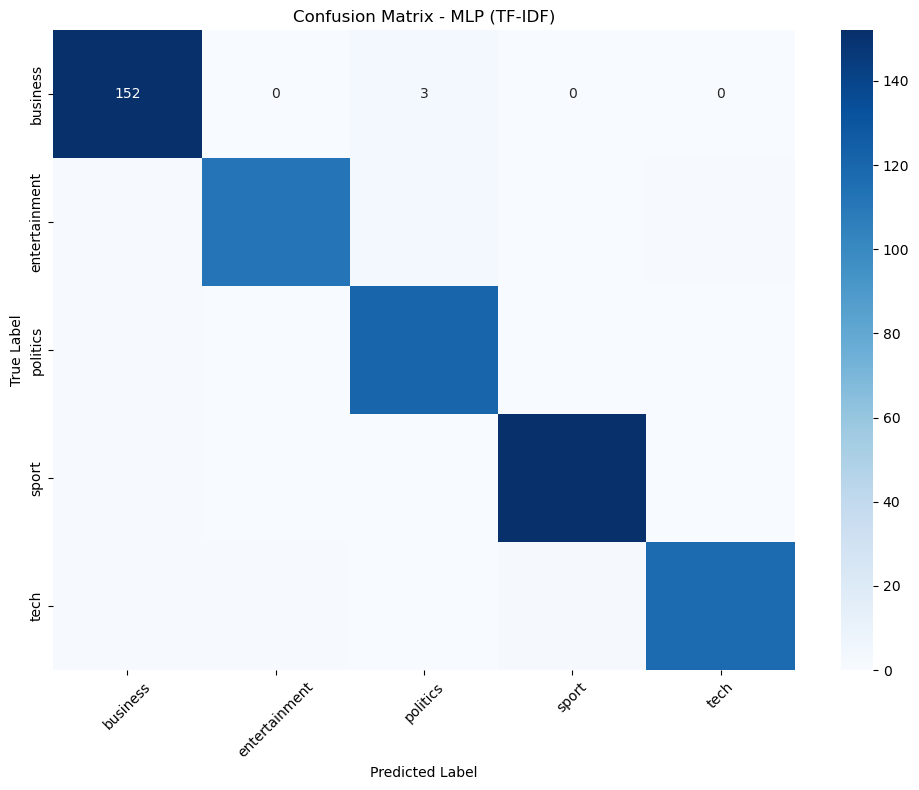


Metrics for MLP (TF-IDF):

Detailed Classification Report:
               precision  recall  f1-score  support
business           0.974   0.981     0.977  155.000
entertainment      0.991   0.957     0.974  117.000
politics           0.953   0.992     0.972  122.000
sport              0.987   0.993     0.990  153.000
tech               0.992   0.967     0.979  121.000
accuracy           0.979   0.979     0.979    0.979
macro avg          0.979   0.978     0.979  668.000
weighted avg       0.979   0.979     0.979  668.000

Overall Accuracy: 0.979

Evaluating Random Forest (TF-IDF)


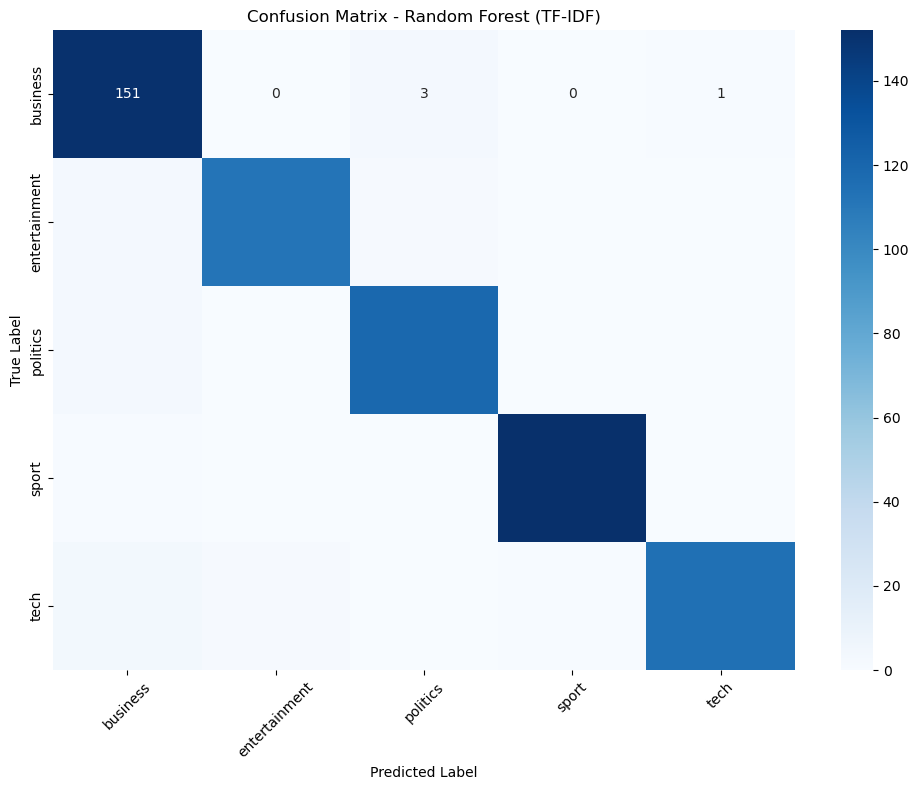


Metrics for Random Forest (TF-IDF):

Detailed Classification Report:
               precision  recall  f1-score  support
business           0.932   0.974     0.953   155.00
entertainment      0.982   0.957     0.970   117.00
politics           0.960   0.975     0.967   122.00
sport              0.993   0.993     0.993   153.00
tech               0.991   0.942     0.966   121.00
accuracy           0.970   0.970     0.970     0.97
macro avg          0.972   0.968     0.970   668.00
weighted avg       0.971   0.970     0.970   668.00

Overall Accuracy: 0.970

Evaluating MLP (spaCy)


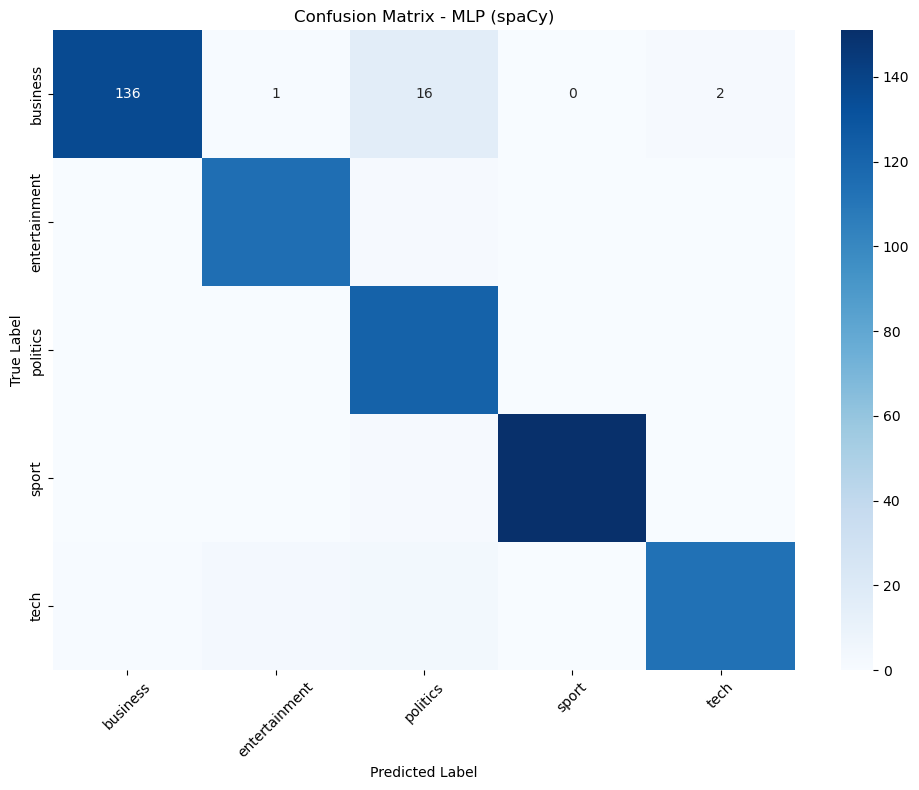


Metrics for MLP (spaCy):

Detailed Classification Report:
               precision  recall  f1-score  support
business           0.993   0.877     0.932  155.000
entertainment      0.966   0.983     0.975  117.000
politics           0.836   1.000     0.910  122.000
sport              1.000   0.987     0.993  153.000
tech               0.983   0.934     0.958  121.000
accuracy           0.954   0.954     0.954    0.954
macro avg          0.955   0.956     0.954  668.000
weighted avg       0.959   0.954     0.954  668.000

Overall Accuracy: 0.954

Evaluating Random Forest (spaCy)


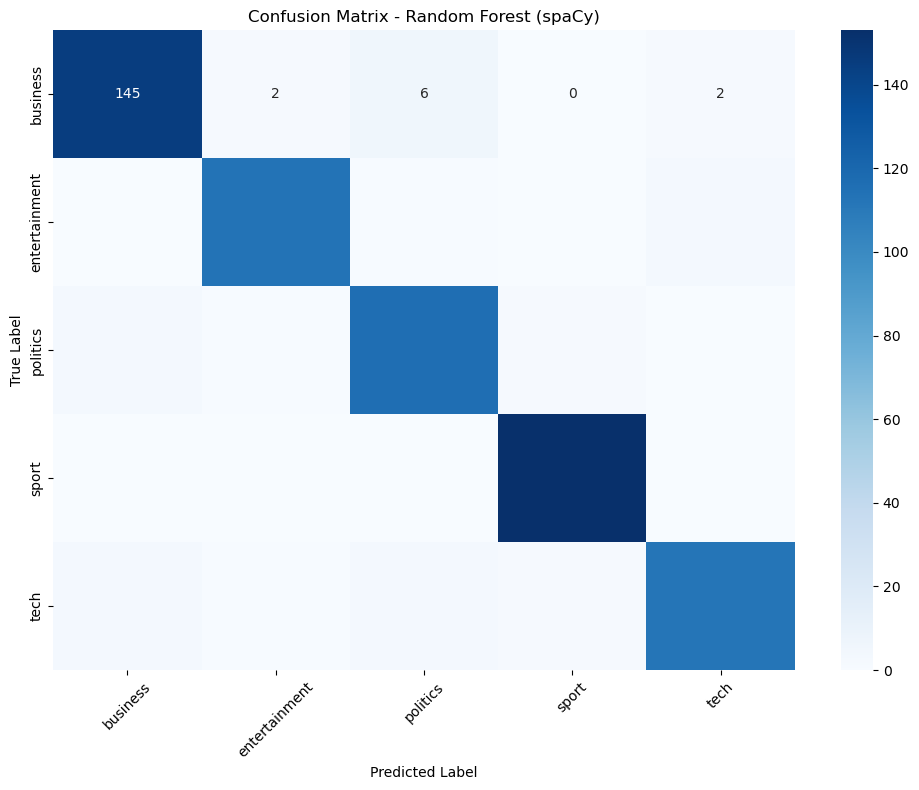


Metrics for Random Forest (spaCy):

Detailed Classification Report:
               precision  recall  f1-score  support
business           0.960   0.935     0.948  155.000
entertainment      0.966   0.966     0.966  117.000
politics           0.921   0.951     0.935  122.000
sport              0.975   1.000     0.987  153.000
tech               0.957   0.926     0.941  121.000
accuracy           0.957   0.957     0.957    0.957
macro avg          0.956   0.956     0.955  668.000
weighted avg       0.957   0.957     0.956  668.000

Overall Accuracy: 0.957

Model Comparison Summary:
                        Accuracy  Precision (weighted)  Recall (weighted)  \
MLP (TF-IDF)               0.979                 0.979              0.979   
Random Forest (TF-IDF)     0.970                 0.971              0.970   
MLP (spaCy)                0.954                 0.959              0.954   
Random Forest (spaCy)      0.957                 0.957              0.957   

                        F

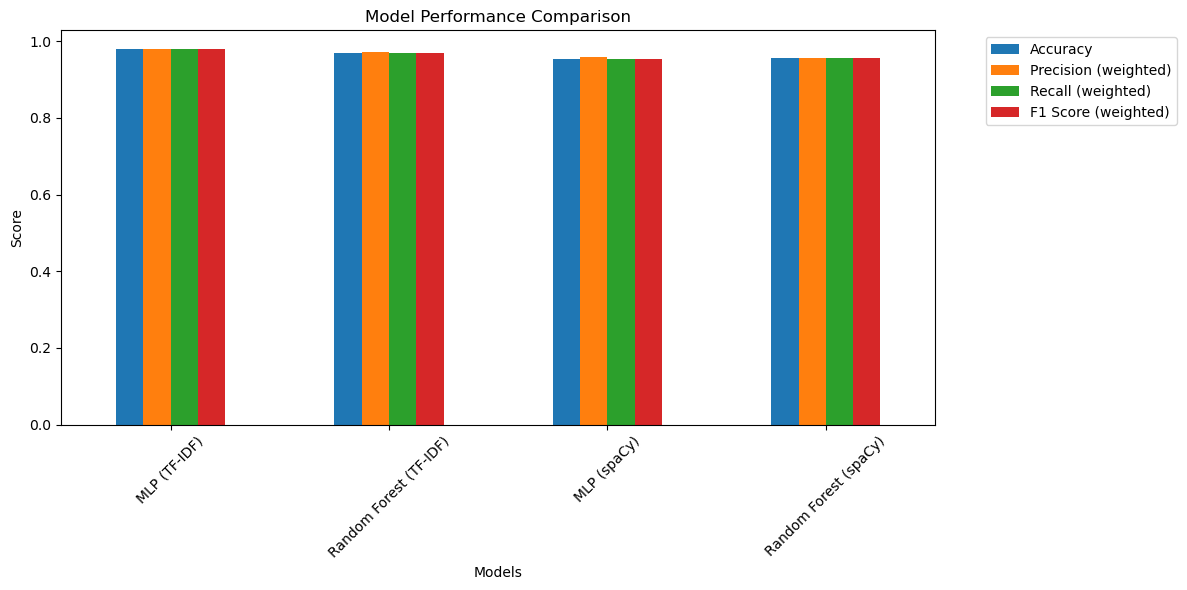

In [28]:
# Create dictionary of all models and their predictions
model_predictions = {
    'MLP (TF-IDF)': y_pred_MLP_categories,
    'Random Forest (TF-IDF)': y_pred_RF_categories,
    'MLP (spaCy)': y_pred_MLP_categories_spacy,
    'Random Forest (spaCy)': y_pred_RF_categories_spacy
}

# Evaluate each model
results = {}
confusion_matrices = {}

for model_name, predictions in model_predictions.items():
    print(f"\nEvaluating {model_name}")
    print("=" * 80)
    report_df, cm = evaluate_classifier(y_test_categories, predictions, model_name)
    results[model_name] = report_df
    confusion_matrices[model_name] = cm

# Create comparison table of key metrics
comparison_metrics = pd.DataFrame()

for model_name, report_df in results.items():
    # Get weighted averages for precision, recall, f1-score
    metrics = report_df.loc['weighted avg', ['precision', 'recall', 'f1-score']]
    accuracy = report_df.loc['accuracy', 'precision']  # accuracy is stored in a specific location in the report
    metrics_series = pd.Series({
        'Accuracy': accuracy,
        'Precision (weighted)': metrics['precision'],
        'Recall (weighted)': metrics['recall'],
        'F1 Score (weighted)': metrics['f1-score']
    }, name=model_name)
    comparison_metrics = pd.concat([comparison_metrics, metrics_series.to_frame().T])

# Print comparison table
print("\nModel Comparison Summary:")
print("=" * 80)
print(comparison_metrics.round(3))

# Optional: Plot comparative bar chart of key metrics
comparison_metrics.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()